## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data=pd.merge(mouse_metadata, study_results, on="Mouse ID", how = "outer")
data=data.sort_values(['Mouse ID', 'Timepoint'])

# Display the data table for preview
data.head()
print(len(data))


1893


In [2]:
# Checking the number of mice.
mouse_num = len(data["Mouse ID"].unique())
print(mouse_num)


249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate= data[['Mouse ID','Timepoint']].duplicated()
duplicate_mouse = data[duplicate]['Mouse ID'].unique()
print(f"The duplicate Mouse ID is {duplicate_mouse[0]}.")

The duplicate Mouse ID is g989.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = data[data[['Mouse ID', 'Timepoint']].duplicated()]
print(duplicate_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
index=data[data['Mouse ID'] == duplicate_mouse[0]].index
clean_df=data.drop(index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


In [6]:
# Checking the number of mice in the clean DataFrame.
print(len(clean_df['Mouse ID'].unique()))

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group=clean_df.groupby(["Drug Regimen"])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
MeanRegimen = (regimen_group["Tumor Volume (mm3)"].mean()).rename("Mean Tumor Volume (mm3)")
MedRegimen =  regimen_group["Tumor Volume (mm3)"].median().rename("Median Tumor Volume (mm3)")
VarRegimen = regimen_group["Tumor Volume (mm3)"].var().rename("Variance")
StDevRegimen = regimen_group["Tumor Volume (mm3)"].std().rename("Standard Deviation")
StdErr = regimen_group["Tumor Volume (mm3)"].sem().rename("SEM")
# Assemble the resulting series into a single summary dataframe.
RegimenSummary = pd.concat([MeanRegimen, MedRegimen, VarRegimen, StDevRegimen, StdErr], axis=1).reset_index()
RegimenSummary


,Drug Regimen,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance,Standard Deviation,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
regimen_group["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std','sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

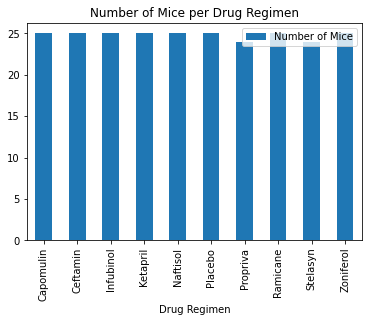

In [49]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mice=regimen_group["Mouse ID"].agg(['nunique'])
total_mice=total_mice.rename(columns = {"nunique":"Number of Mice"})
total_mice.plot(kind="bar", title="Number of Mice per Drug Regimen")
plt.show()

Text(0.5, 1.0, 'Number of Mice per Drug Regimen')

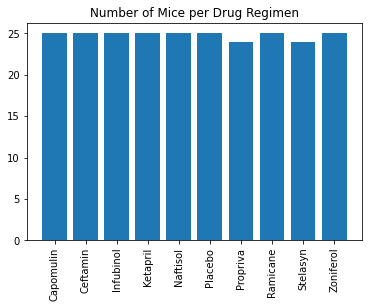

In [63]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x = np.array(total_mice.reset_index()["Drug Regimen"])
xvalues = np.arange(len(x))
yvalues = np.array(regimen_group['Mouse ID'].nunique())
plt.bar(xvalues, yvalues, align = 'center', tick_label = x)
plt.xticks(rotation='vertical')
plt.title("Number of Mice per Drug Regimen")

Text(0, 0.5, 'Number of Mice')

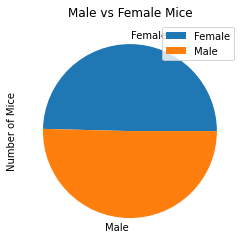

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby('Sex')["Mouse ID"].agg(['nunique'])
M_F=gender.plot(kind='pie', y='nunique' ,title = "Male vs Female Mice")
M_F.set_ylabel("Number of Mice")



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot




## Quartiles, Outliers and Boxplots

In [128]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
lasttime = clean_df.groupby('Mouse ID')['Timepoint'].agg(['max']).reset_index()
lasttime=lasttime.rename(columns={'max':'Max Time'})


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_data=pd.merge(clean_df, lasttime, on="Mouse ID", how = "outer")
mouse_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Time
0,a203,Infubinol,Female,20,23,0,45.000000,0,45
1,a203,Infubinol,Female,20,23,5,48.508468,0,45
2,a203,Infubinol,Female,20,23,10,51.852437,1,45
3,a203,Infubinol,Female,20,23,15,52.777870,1,45
4,a203,Infubinol,Female,20,23,20,55.173336,1,45


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

outliers=[]    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    mouseid=mouse_data.loc[(mouse_data["Drug Regimen"]==treatment) & (mouse_data['Timepoint']==mouse_data['Max Time'])]
    mouseid=mouseid.set_index('Drug Regimen')
    tumor_vol.append(mouseid['Tumor Volume (mm3)'])
    # Determine outliers using upper and lower bounds
    quartiles = mouseid['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    check_outliers=(mouseid.loc[(mouseid['Tumor Volume (mm3)']>upper_bound)|(mouseid['Tumor Volume (mm3)']<lower_bound)])
    outliers=check_outliers["Mouse ID"].unique()
    print("For the drug "+treatment+":")
    print(f"The lower quartile of the final tumor volume is: {lowerq}")
    print(f"The upper quartile of the final tumor volume is: {upperq}")
    print(f"The interquartile range of the final tumor volume is: {iqr}")
    print(f"The the median of the final tumor volume is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"Possible outliers include:{outliers}")
    print("-------------------")


For the drug Capomulin:
The lower quartile of the final tumor volume is: 32.37735684
The upper quartile of the final tumor volume is: 40.1592203
The interquartile range of the final tumor volume is: 7.781863460000004
The the median of the final tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Possible outliers include:[]
-------------------
For the drug Ramicane:
The lower quartile of the final tumor volume is: 31.56046955
The upper quartile of the final tumor volume is: 40.65900627
The interquartile range of the final tumor volume is: 9.098536719999998
The the median of the final tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Possible outliers include:[]
-------------------
For the drug Infubinol:
The lower quartile of the final tumor volume is: 54.04860769
The upper quartile of the final tumor volume is: 65.52574285
The interq

([<matplotlib.axis.XTick at 0x29c86586668>,
 [Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Ramicane'),
  Text(3, 0, 'Infubinol'),
  Text(4, 0, 'Ceftamin')])

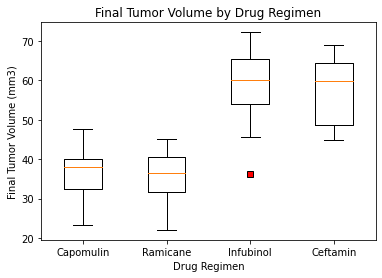

In [192]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interes

fig1, ax1= plt.subplots()
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
red_square=dict(markerfacecolor='r', marker='s')
ax1.boxplot(tumor_vol, flierprops=red_square)
plt.xticks([1, 2, 3, 4], treatments)

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
